### brunch 작가 데이터 수집 
1. 브런치 follower, following 정보 수집 
1. 브런치 작기 정보 수집

In [2]:
import urllib
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns, numpy as np

import matplotlib.pylab as plt
%matplotlib inline

In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time


1. 브런치 Follower(구독자), Following(관심작가) 정보 수집 
```html
<ul class="list_follow">객체에서
a tag href="/@"으로 시작하는 아이디 가져오기
```
<img src='https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/Kvs/image/vS4eDK8M1R8ytc0HUJTlG8Vk-jg.png'>

* crawling 절차
 * https://brunch.co.kr/@{user-id}/{following} URL로 HTML을 크롤링한다. 
    : brunch 관심작가, 구독자가 공개는 되어 있지만, 무한 스크롤 방식의 UX를 사용하기 때문에 셀리늄2.0(webdriver)를 통해 html을 크롤링할수 있다. 
 * 크롤링된 HTML을 BS4로 class = link_follow 이고 herf = '@****' 로 시작되는 아이디만 추출
 

In [4]:
# brunch data crawling by 셀레니엄
# source reference : http://stackoverflow.com/questions/12519074/scrape-websites-with-infinite-scrolling
def crawlBrunchLink(uid, dir='follower', driver=webdriver.Firefox()):
    ## html crawling
    url = "https://brunch.co.kr/@{uid}/{dir}".format(uid=uid, dir=dir)
    driver.get(url)

    htmlsize = 0
    keep_cnt = 0
    for i in range(1,200):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.003) 
        if htmlsize == len(driver.page_source):
            keep_cnt += 1
        else :
            keep_cnt = 0
            htmlsize = len(driver.page_source)
        if keep_cnt > 5 :
            break
            
    html_source = driver.page_source
    ## extract follower, following data
    data = html_source.encode('utf-8')
    soup = BeautifulSoup(data, 'html.parser')
    classes = soup.find_all("a", class_="link_follow")
    idlist = []
    for c in classes:
        follwing = c.get('href')
        if follwing is None or len(follwing)==0:
            continue
        idlist.append(follwing[2:])

    #driver.close()
    return idlist

In [5]:
## 관심 작가 정보 크롤링 하기 
## extract Brunch Writer Info : uid, name, text-count, megazine-count, follower-count, following-count:
def extractWriterInfo(uid):
    try:
        response = requests.get("http://brunch.co.kr/@{uid}".format(uid=uid) )
    except Exception:
        []
        
    data = response.content.decode('utf-8')
    soup = BeautifulSoup(data, 'html.parser')
    
    ## name 
    names = soup.find_all("strong", class_="profileUserName")
    name = uid if len(names)<1 else names[0].getText()
    
    classes = soup.find_all("span", class_="num_count")
    reserved = [uid, name]
    for c in classes:
        reserved.append(int(c.getText()))
    return reserved

* 관심 작가의 구독자 리스트 가져오기 

In [6]:
base = 'goodvc78'
driver = webdriver.Firefox()
base_follower = crawlBrunchLink(base, dir='follower', driver=driver)
print ("내가 좋아하는 작가의 followers = %d" %  len(base_follower) )
driver.close()

내가 좋아하는 작가의 followers = 10


In [7]:
print(base_follower[:4])

[u'thddl0207', u'kmrho1103', u'jkeun1224', u'sbh1100']


In [8]:
## 관심 작가의 구독자(follower)를 크롤링하고
## 구독자가 등록한 관심작가(following)을 크롤링한다. 

def crawlwriter( uid ) :
    driver = webdriver.Firefox()
    ## read own follower
    follower = crawlBrunchLink(uid, dir='follower', driver=driver)
    
    ## start crawling 
    data = {}
    current = 0
    follower_cnt = len(follower)
    for n in follower[:]:
        followers = crawlBrunchLink( n, 'following', driver=driver )
        data[n] = { 'following': followers }
        current += 1
        print ( "{2} : {0}/{1}".format(current, follower_cnt, uid) )
    driver.close()
    return data

In [9]:
## goodvc78의 구독자리스트를 크롤링하고, 그 구독자의 관심작가 리스트를 크롤링한다. 
ds = {}
ds['goodvc78'] = crawlwriter('goodvc78')

goodvc78 : 1/169
goodvc78 : 2/169
goodvc78 : 3/169
goodvc78 : 4/169
goodvc78 : 5/169
goodvc78 : 6/169
goodvc78 : 7/169
goodvc78 : 8/169
goodvc78 : 9/169
goodvc78 : 10/169
goodvc78 : 11/169
goodvc78 : 12/169
goodvc78 : 13/169
goodvc78 : 14/169
goodvc78 : 15/169
goodvc78 : 16/169
goodvc78 : 17/169
goodvc78 : 18/169
goodvc78 : 19/169
goodvc78 : 20/169
goodvc78 : 21/169
goodvc78 : 22/169
goodvc78 : 23/169
goodvc78 : 24/169
goodvc78 : 25/169
goodvc78 : 26/169
goodvc78 : 27/169
goodvc78 : 28/169
goodvc78 : 29/169
goodvc78 : 30/169
goodvc78 : 31/169
goodvc78 : 32/169
goodvc78 : 33/169
goodvc78 : 34/169
goodvc78 : 35/169
goodvc78 : 36/169
goodvc78 : 37/169
goodvc78 : 38/169
goodvc78 : 39/169
goodvc78 : 40/169
goodvc78 : 41/169
goodvc78 : 42/169
goodvc78 : 43/169
goodvc78 : 44/169
goodvc78 : 45/169
goodvc78 : 46/169
goodvc78 : 47/169
goodvc78 : 48/169
goodvc78 : 49/169
goodvc78 : 50/169
goodvc78 : 51/169
goodvc78 : 52/169
goodvc78 : 53/169
goodvc78 : 54/169
goodvc78 : 55/169
goodvc78 : 56/169
g

In [10]:
def toDataframe(src) :
    data = []
    for n, f in src.items():
        for nn in f['following']:
            data.append([n,'following',nn])
    return pd.DataFrame(data, columns=['uid','dir','target'])

In [11]:
ds_goodvc78 = toDataframe( ds['goodvc78'])

In [12]:
ds_goodvc78.head()

,uid,dir,target
0,bskim987,following,goodvc78
1,bskim987,following,brunch
2,lotussoul,following,goodvc78
3,lotussoul,following,insuk
4,lotussoul,following,sunnysideup


### 평균 관심작수 등록수, 평균 구독자 수 

In [13]:
## 관심 작가 통계
ds_goodvc78.groupby(['uid']).count().describe()[['target']]

,target
count,169.000000
mean,29.082840
std,53.852137
min,2.000000
25%,5.000000
50%,12.000000
75%,29.000000
max,386.000000


skew = 4.50003197728


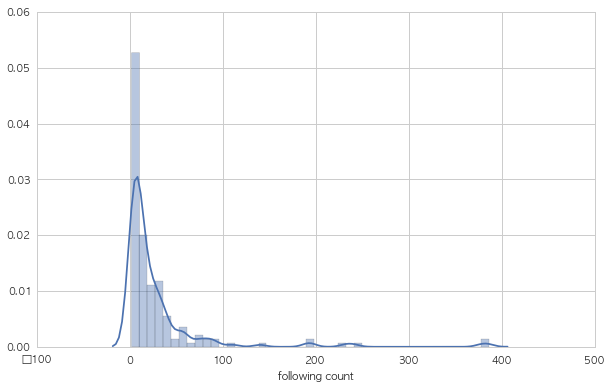

In [14]:
import seaborn as sns, numpy as np
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['font.family'] = 'AppleGothic'
rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))

ax = sns.distplot(ds_goodvc78.groupby(['uid']).count().target )
ax.set_xlabel(u'following count')
print( 'skew = {0}'.format( ds_goodvc78.groupby(['uid']).count().target.skew()))

In [15]:
## filtering my-id and official-id ( goodvc78, brunch ) 
ds_goodvc78 = ds_goodvc78[~ds_goodvc78.target.isin(['goodvc78','brunch'])]

* 크롤링한 데이터 파일로 저장 

In [16]:
### crawled data save
import pickle
output = open('/Users/goodvc/Data/fc-recsys-school/ch1/resource/brunch_sns.pkl', 'wb')
pickle.dump(ds, output)
output.close()

In [17]:
## road pickle data
pkl_file = open('/Users/goodvc/Data/fc-recsys-school/ch1/resource/brunch_sns.pkl', 'rb')
loaded = pickle.load(pkl_file)
pkl_file.close() 